# Police Killings

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
print(police_killings.head(5))
print(police_killings.columns)


                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

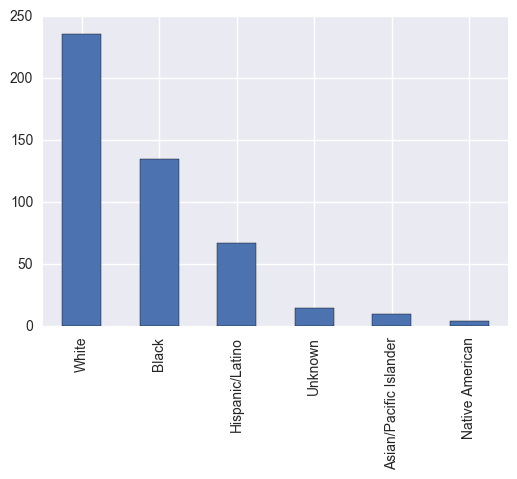

In [12]:
%matplotlib inline
ethnicity = police_killings['raceethnicity'].value_counts()
ethnicity.plot(kind='bar')
sns.plt.show()


# Combine Police Killings Data with State Population Data

In [16]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on = "STATE")
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']
sorted_rate = states.sort_values(by=['rate'], ascending=False)
low_sorted_rate = sorted_rate[-10:]['STATE']
high_sorted_rate = sorted_rate[:10]['STATE']

sorted_rate.head(5)

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,STATE_ID,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,OK,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,AZ,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,NE,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,HI,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,AK,0.738432,2.708442


In order to merge the data, pulled only the State and Shooting statistic from the police killings dataframe and merged on the State ID with the State Population Data. After the merge, sorted by rate as defined as shootings/mil-population. Finally printed the sorted_rate dataframe head.

# State by State data

In [14]:
pk = police_killings[(police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') & (police_killings['share_hispanic'] != '-')]
pk[['share_white','share_black','share_hispanic']] = pk[['share_white','share_black','share_hispanic']].astype(float)
high_ten = pk[pk['state_fp'].isin(high_sorted_rate)]
low_ten = pk[pk['state_fp'].isin(low_sorted_rate)]
combined = pd.DataFrame({'High': high_ten[['share_white','share_black','share_hispanic']].mean(), 'Low': low_ten.mean()})
print(high_ten.columns)
print(high_ten.mean())
print(combined)

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'latitude', u'longitude',
       u'state_fp', u'county_fp', u'tract_ce', u'geo_id', u'county_id',
       u'namelsad', u'lawenforcementagency', u'cause', u'armed', u'pop',
       u'share_white', u'share_black', u'share_hispanic', u'p_income',
       u'h_income', u'county_income', u'comp_income', u'county_bucket',
       u'nat_bucket', u'pov', u'urate', u'college'],
      dtype='object')
day               1.563043e+01
year              2.015000e+03
latitude          3.569250e+01
longitude        -1.059019e+02
state_fp          1.961957e+01
county_fp         4.608696e+01
tract_ce          2.372074e+05
geo_id            1.966589e+10
county_id         1.966565e+04
pop               4.315750e+03
share_white       5.565217e+01
share_black       1.153261e+01
share_hispanic    2.069348e+01
h_income          4.332715e+04
county_income     4.870697e+04
comp_income       8.9

Create new dataframes baased on the sorted dataframe but utilizing all of the police killings dataframe. 

In [29]:
sorted_rate['text'] = sorted_rate['NAME'] + '<br>' + 'Population Millions ' + sorted_rate['pop_millions'].astype(str) + '<br>' + 'Shooting Rate ' + sorted_rate['rate'].astype(str)
sorted_rate

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,STATE_ID,pop_millions,rate,text
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,OK,3.911338,5.624674,Oklahoma<br>Population Millions 3.911338<br>Sh...
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,AZ,6.828065,3.661359,Arizona<br>Population Millions 6.828065<br>Sho...
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,NE,1.896190,3.164240,Nebraska<br>Population Millions 1.89619<br>Sho...
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,HI,1.431603,2.794071,Hawaii<br>Population Millions 1.431603<br>Shoo...
39,2,2,40,4,9,Alaska,738432,552166,74.8,AK,0.738432,2.708442,Alaska<br>Population Millions 0.738432<br>Shoo...
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,ID,1.654930,2.417021,Idaho<br>Population Millions 1.65493<br>Shooti...
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,NM,2.085109,2.397956,New Mexico<br>Population Millions 2.085109<br>...
10,22,11,40,3,7,Louisiana,4670724,3555911,76.1,LA,4.670724,2.355095,Louisiana<br>Population Millions 4.670724<br>S...
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,CO,5.456574,2.199182,Colorado<br>Population Millions 5.456574<br>Sh...
41,10,2,40,3,5,Delaware,945934,741548,78.4,DE,0.945934,2.114312,Delaware<br>Population Millions 0.945934<br>Sh...


# Plotly plot by State

In [28]:
#Generate Geographical Map of Shootings by State
import plotly.plotly as py
py.sign_in('aolsonxc', '4uqpoc45qi')


scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = sorted_rate['STATE_ID'],
        z = sorted_rate['shootings'].astype(float),
        locationmode = 'USA-states',
        text = sorted_rate['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Occurences")
        ) ]

layout = dict(
        title = 'Police Killings by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aolsonxc/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


Use plotly chart to show shooting statistics by state. ND,SD and NH didn't have any data and therefore appear blank on this chart. Would need to go find data in order to properly characterize. Map shows that the largest number of shootings occurred in California. 

# Cause Barplots

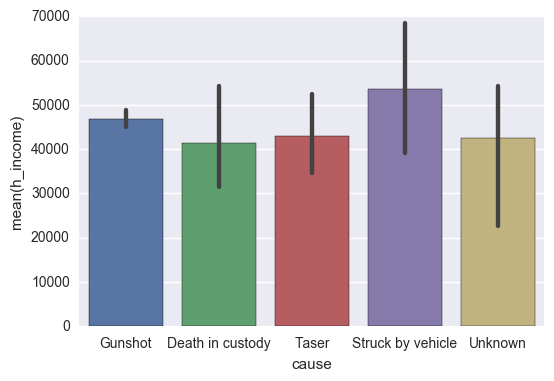

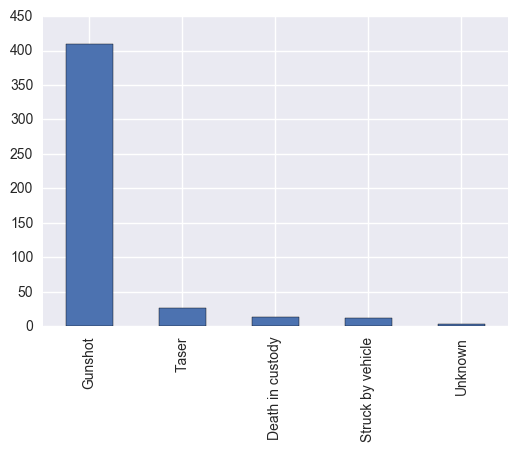

In [43]:
import seaborn as sns
#Various barplots using cause as x axis
sns.barplot(x = "cause", y = "h_income", data = pk)
sns.plt.show()

#Plot showing value counts of causes of police killings
cause = pk['cause'].value_counts()
cause.plot(kind='bar')
sns.plt.show()

The most common root cause of a police killing is by gunshot, which makes sense. 